In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

sns.set_style("darkgrid")


2025-04-15 19:33:11.643346: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 19:33:11.646838: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 19:33:11.655957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744745591.670885   38145 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744745591.675469   38145 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744745591.688625   38145 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

### Load the Google Stock Price Dataset

In [3]:
# Load dataset
df = pd.read_csv('Google_Stock_Price_Train.csv')
df.head()


,Date,Open
0,01/02/2012,304.53
1,01/03/2012,306.33
2,01/04/2012,309.29
3,01/05/2012,314.77
4,01/06/2012,319.50


### Data Preprocessing

In [4]:
# Only use the 'Open' column
training_set = df['Open'].values
training_set = training_set.reshape(-1, 1)

# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create data structure with 60 timesteps and 1 output
X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape for RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


### Building the RNN Model

In [5]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.summary()


2025-04-15 19:58:59.612553: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [6]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1044
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0013
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 7.0864e-05
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3.7061e-05
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3.2012e-05
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 2.5997e-05
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.3642e-05
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.3733e-05
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.2297e-05
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.2296e-05
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.3571e-05
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.9910e-05
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.2098e-05
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 2.1601e-05
Epoch 15/20
38/38 ━━━━━

### Making Predictions and Visualizing Results

In [7]:
# Load test data
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test['Open'].values.reshape(-1, 1)

# Combine and scale
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 60 + len(dataset_test)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


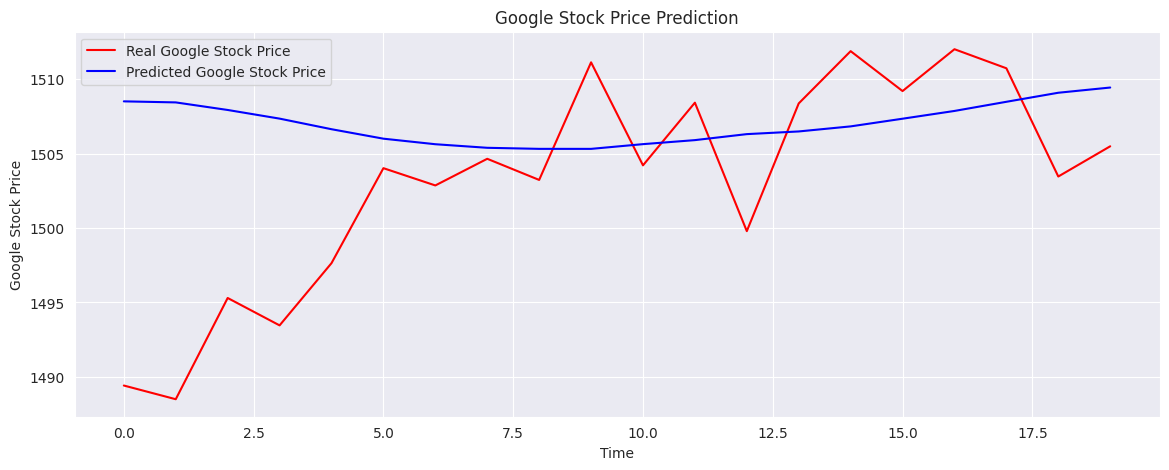

In [8]:
# Plotting
plt.figure(figsize=(14,5))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
